In [1]:
# Importación de pandas para traspasar el dataset de CSV a dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_Train_clean = pd.read_csv('df_Train_clean_v3.csv')

#borrar
vehicles = pd.read_csv(r"C:\Users\smont\Documents\first_repo\Labs\lab-regression-analysis-es\vehicles.csv")
df_step_0 = vehicles


#quitar comentario df_step_0 = df_Train_clean

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df=df_step_0.drop('Highway MPG', axis=1)
df=df.drop('City MPG', axis=1)
df=df.drop('Fuel Type', axis=1)
df=df.drop('Vehicle Class', axis=1)
df=df.drop('Drivetrain', axis=1)
df=df.drop('Transmission', axis=1)
df=df.drop('Engine Displacement', axis=1)
df=df.drop('Model', axis=1)
df=df.drop('Make', axis=1)

# Separar características y objetivo
X = df.drop('CO2 Emission Grams/Mile', axis=1)

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# columnas_a_escalar = X.columns
# X[columnas_a_escalar] = scaler.fit_transform(X[columnas_a_escalar])

y = df['CO2 Emission Grams/Mile']

# Supongamos que tienes las variables predictoras en X y la variable objetivo en y
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 289.8277440813781
R^2: 0.9794542628636334


El  modelo no es bueno en cuanto a R^2, por lo que es necesario revisar los datos de entrada.

In [3]:
# Crear un DataFrame con los valores reales y predichos
resultados = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Predicho': y_pred
})

# Mostrar las primeras filas del DataFrame de resultados
print(resultados.head())

       Valor Real  Valor Predicho
22550  341.807692      342.677257
17714  522.764706      516.837694
25440  423.190476      437.236984
26306  604.000000      583.054594
21624  484.000000      489.360969


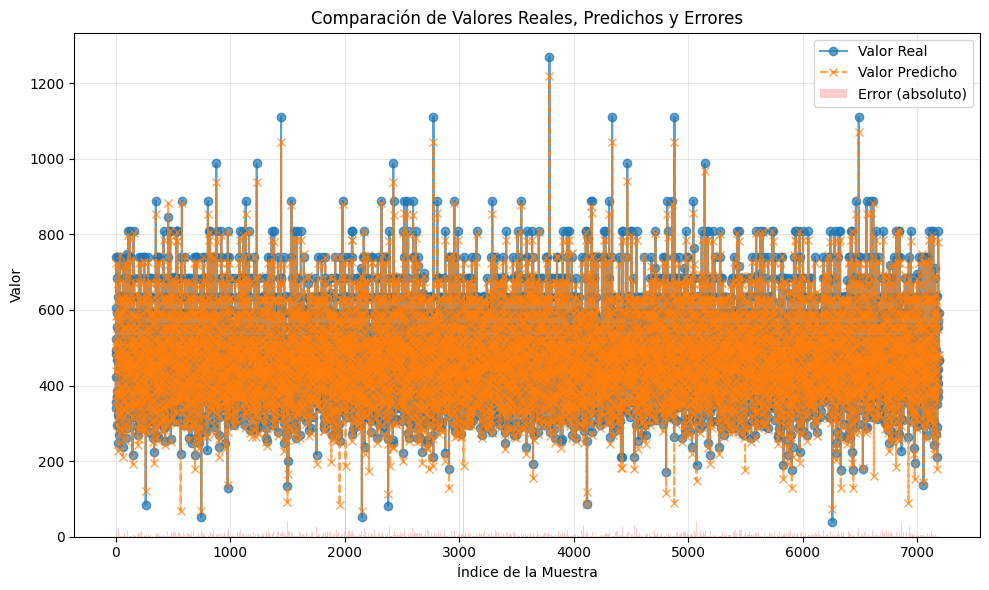

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes los valores reales y predichos
# y_test: valores reales
# y_pred: valores predichos

# Calcular los errores
errores = np.abs(y_test - y_pred)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valor Real', marker='o', linestyle='-', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Valor Predicho', marker='x', linestyle='--', alpha=0.7)
plt.bar(range(len(errores)), errores, color='red', alpha=0.2, label='Error (absoluto)')

# Etiquetas y leyenda
plt.title('Comparación de Valores Reales, Predichos y Errores')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

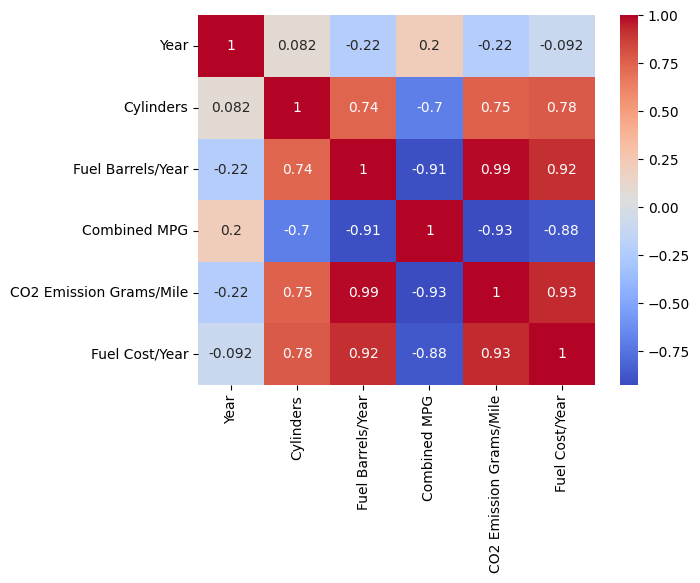

In [5]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

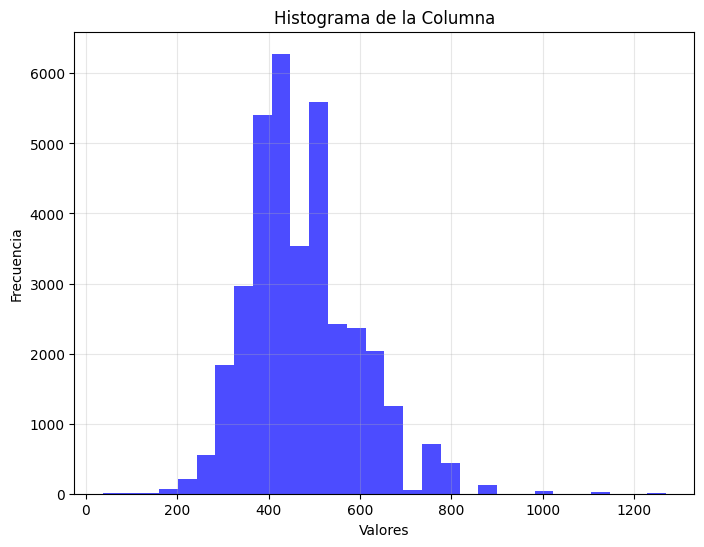

In [6]:
import matplotlib.pyplot as plt

# Supongamos que 'columna' es el nombre de tu columna en el DataFrame
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='blue', alpha=0.7)
plt.title('Histograma de la Columna')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

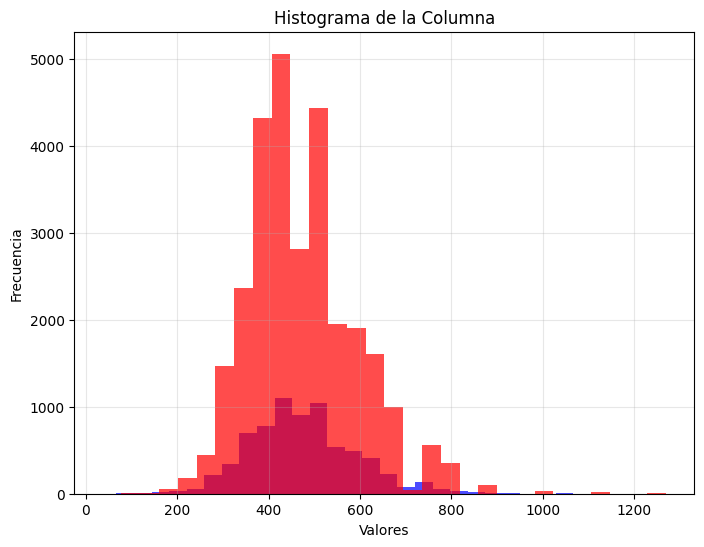

In [7]:
import matplotlib.pyplot as plt

# Supongamos que 'columna' es el nombre de tu columna en el DataFrame
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=30, color='blue', alpha=0.7)
plt.hist(y_train, bins=30, color='red', alpha=0.7)
plt.title('Histograma de la Columna')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

Pairplot y los valores de significancia.

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                             18:08:30   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

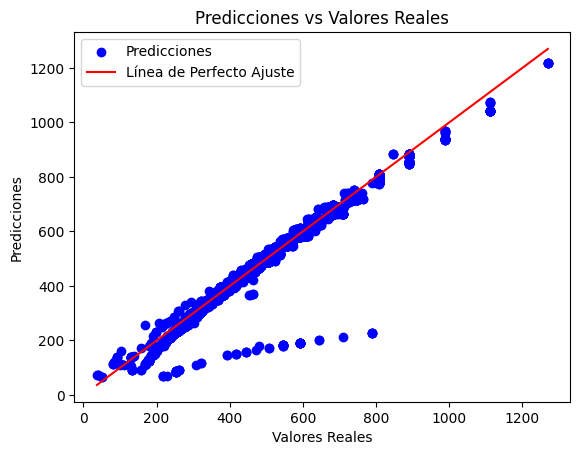

In [8]:
import statsmodels.api as sm
import pandas as pd

# Añadir una constante a X (para el término independiente del modelo)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()  # OLS es Ordinary Least Squares, la regresión lineal

# Ver el resumen del modelo
print(model.summary())

# Realizar predicciones sobre el mismo conjunto de datos
predicciones = model.predict(X)

# Mostrar las predicciones
print(predicciones)

import matplotlib.pyplot as plt

# Graficar valores reales vs. predicciones
plt.scatter(y, predicciones, color='blue', label='Predicciones')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Línea de Perfecto Ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

In [9]:
# sns.pairplot(df, hue="Attrition_rate")
# plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
columns_study = X = df.drop('Time_since_promotion', axis=1).columns
seed = 123456
scores = []
regr_feat1 = LinearRegression()

for i in columns_study:
    # Definir variable predictora (X) y variable de resultado (y)
    X = df[[i]]  # Predictor
    #y = vehicles['CO2 Emission Grams/Mile']    # Resultado

    #from sklearn.model_selection import train_test_split
    # Split in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
    # from sklearn import linear_model
    
    # from sklearn.linear_model import LinearRegression
    # Create the Linear Regression estimator
    lm = LinearRegression()
    
    # Perform the fitting
    lm.fit(X_train, y_train)
    
    # Print coefs
    print(lm.intercept_, lm.coef_)

    xmin, xmax = round(X.min()), round(X.max())
    print(xmin)
    print(xmax)
    x_model = np.arange(int(xmin), int(xmax)+1)
    y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.
    
    plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
    plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
    plt.plot(x_model, y_model,'r'); 
    
    plt.legend()
    plt.show()

    # Create the Linear Regression estimator
    lm = LinearRegression()
    
    # Perform the fitting
    lm.fit(X_train, y_train)
    
    # Print coefs
    print(lm.intercept_, lm.coef_)

    # Compute Score for training and testing sets 
    train_score = lm.score(X_train, y_train)
    test_score = lm.score(X_test, y_test)
    
    print(train_score, test_score)
    
    # Compute MSE for training and testing sets 
    y_train_pred = lm.predict(X_train)
    y_test_pred = lm.predict(X_test)
    
    mse_train = np.mean((y_train_pred - y_train)**2)
    mse_test = np.mean((y_test_pred - y_test)**2)
    print(mse_train, mse_test)

    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)
    X_train_df
    X_train_sm = sm.add_constant(X_train_df)
    est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator
    est = est.fit()
    est.summary()

    X_test_sm = sm.add_constant(X_test_df)
    y_pred = est.predict(X_test_sm)
    
    # Evaluamos la performance del modelo con RMSE y R^2
    from sklearn.metrics import mean_squared_error, r2_score
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del error cuadrático medio
    r2 = r2_score(y_test, y_pred)  # R^2
    
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")


KeyError: "['Time_since_promotion'] not found in axis"